In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('2021.csv')

In [ ]:
JhonStones = data[data['Name']=='John Stones']
Tonykroos = data[data['Name']=='Toni Kroos']
data.loc[467]

In [ ]:
JhonStones

In [5]:
desired_attributes = ['Dribbling', 'Vision', 'ShortPass', 'LongPass', 'Reactions', 'BallControl']
JhonStones = JhonStones[desired_attributes]
Tonykroos=Tonykroos[desired_attributes]

In [8]:
comparison_players = data[data['Name'].isin(['John Stones', 'Ismaël Bennacer'])]


In [9]:
comparison_players.set_index('Name', inplace=True)
comparison_players =comparison_players[desired_attributes]
comparison_players = comparison_players.transpose()

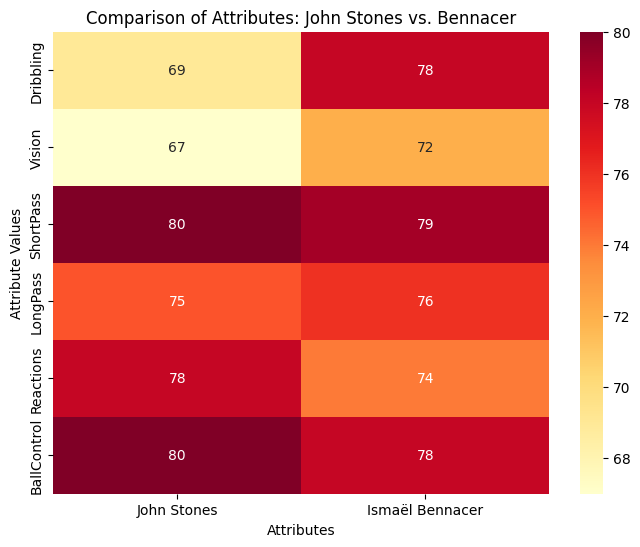

In [10]:

plt.figure(figsize=(8, 6))
sns.heatmap(comparison_players, annot=True, cmap='YlOrRd')
plt.xlabel('Attributes')
plt.ylabel('Attribute Values')
plt.title('Comparison of Attributes: John Stones vs. Bennacer')
# Display the plot
plt.show()

"""""""""""""""

In [11]:
import plotly.graph_objects as go

In [16]:

position_counts = data.groupby(['Natinality', 'PreferredPositions']).size().reset_index(name='Count')


Searching for algeria players to do some analyse latter

In [20]:
algeria =position_counts[position_counts['Natinality']== 'Algeria']

now we go back to our data

i found a problem there is a lot of postions i want to save only the principal position , the first one only


In [27]:
def garde_first_position(position):
    positions = position.split('/')
    return positions[0].strip()

In [34]:
garde_first_position('RW')

'RW'

In [37]:
position_counts['PreferredPositions'] = position_counts['PreferredPositions'].str.split('/').str[0].str.strip()


In [39]:
algeria =position_counts[position_counts['Natinality']== 'Algeria']

In [ ]:
position_counts

In [56]:
grouped_counts = position_counts.groupby(['Natinality', 'PreferredPositions']).count().reset_index()

# Pivot the grouped data to transform it into the desired format
p_data = grouped_counts.pivot(index='Natinality', columns='PreferredPositions', values='Count').fillna(0)

# Reset the index of the resulting DataFrame
p_data.reset_index(inplace=True)

In [71]:
p_data

PreferredPositions,Natinality,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Albania,1.0,1.0,5.0,0.0,2.0,1.0,2.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,Algeria,2.0,3.0,1.0,0.0,5.0,1.0,2.0,2.0,2.0,0.0,3.0,2.0,4.0,0.0,1.0
3,Andorra,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Angola,3.0,2.0,0.0,2.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Uzbekistan,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
156,Venezuela,6.0,5.0,5.0,0.0,6.0,1.0,4.0,5.0,3.0,0.0,4.0,7.0,3.0,1.0,7.0
157,Wales,5.0,2.0,4.0,0.0,5.0,1.0,3.0,2.0,0.0,2.0,5.0,6.0,2.0,2.0,3.0
158,Zambia,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0


In [72]:
import plotly.graph_objects as go


In [100]:
fig = go.Figure(data=go.Choropleth(
    locations=p_data['Natinality'],
    z=p_data['CM'],
    locationmode='country names',
    colorscale='Greens',

    marker_line_color='darkgray',
    marker_line_width=0.5,
))
fig.update_layout(
    title_text='Distribution of Midfielder Positions by Country',
    geo=dict(
        showframe=True,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    coloraxis_colorbar=dict(title='Count of midfielder Positions')
)



fig.show()



